# Web Scraping & Data Visualization Project  
### Quotes & Authors Dataset (From Quotes.toscrape.com)

This project demonstrates a complete data journey:
- Data collection using web scraping (BeautifulSoup & Python requests)
- Data structuring & cleaning
- Data visualization & insights discovery

Dataset includes:
- Quote text
- Author name
- Tags
- Author details: birth date, birth location, biography

The goal is to explore:
- Which authors are most quoted?
- What themes are most popular?
- How do quote characteristics differ?


# Import & Load Data

In [9]:
# === IMPORTS — ONLY HERE ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px
import ast
from wordcloud import WordCloud

sns.set(style="whitegrid")


# Data Exploration

In [2]:
df = pd.read_csv("../data/quotes_final.csv")
df.head()

,quote,author,tags,author_link,born_date,born_location,description
0,“The world as we have created it is a process ...,Albert Einstein,"['change', 'deep-thoughts', 'thinking', 'world']",/author/Albert-Einstein,"March 14, 1879","in Ulm, Germany","In 1879, Albert Einstein was born in Ulm, Germ..."
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"['abilities', 'choices']",/author/J-K-Rowling,"July 31, 1965","in Yate, South Gloucestershire, England, The U...",See also: Robert GalbraithAlthough she writes ...
2,“There are only two ways to live your life. On...,Albert Einstein,"['inspirational', 'life', 'live', 'miracle', '...",/author/Albert-Einstein,"March 14, 1879","in Ulm, Germany","In 1879, Albert Einstein was born in Ulm, Germ..."
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"['aliteracy', 'books', 'classic', 'humor']",/author/Jane-Austen,"December 16, 1775","in Steventon Rectory, Hampshire, The United Ki...",Jane Austen was an English novelist whose work...
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"['be-yourself', 'inspirational']",/author/Marilyn-Monroe,"June 01, 1926",in The United States,Marilyn Monroe (born Norma Jeane Mortenson; Ju...


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   quote          100 non-null    object
 1   author         100 non-null    object
 2   tags           100 non-null    object
 3   author_link    100 non-null    object
 4   born_date      99 non-null     object
 5   born_location  99 non-null     object
 6   description    99 non-null     object
dtypes: object(7)
memory usage: 5.6+ KB


In [4]:
df.isna().sum()

quote            0
author           0
tags             0
author_link      0
born_date        1
born_location    1
description      1
dtype: int64

# Visualization

### 🧠 Insight
Albert Einstein is the most quoted author in this dataset, followed by J.K. Rowling and Marilyn Monroe — 
indicating strong representation of:
- philosophical quotes
- motivational messages
- cultural/pop icons


C:\Users\linda\AppData\Local\Temp\ipykernel_9464\882341809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis")


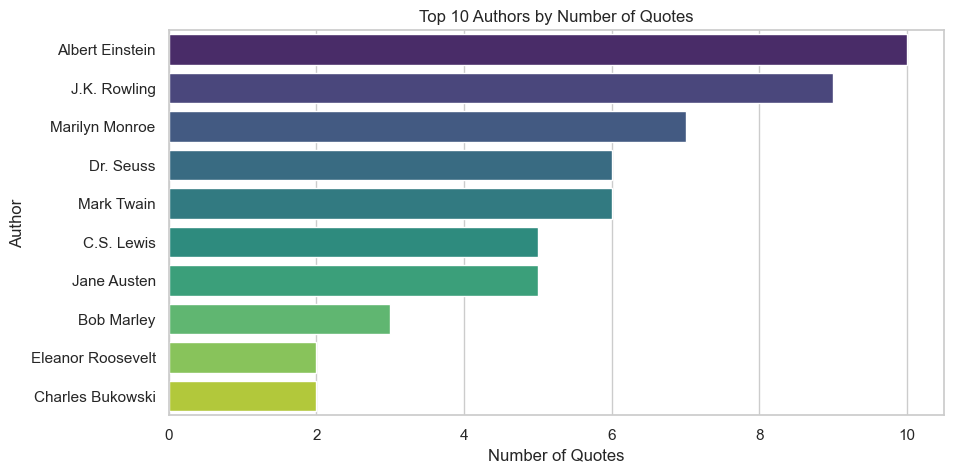

In [5]:
top_authors = df['author'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis")
plt.title("Top 10 Authors by Number of Quotes")
plt.xlabel("Number of Quotes")
plt.ylabel("Author")
plt.show()


C:\Users\linda\AppData\Local\Temp\ipykernel_9464\396205818.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tags_df, x="count", y="tag", palette="coolwarm")


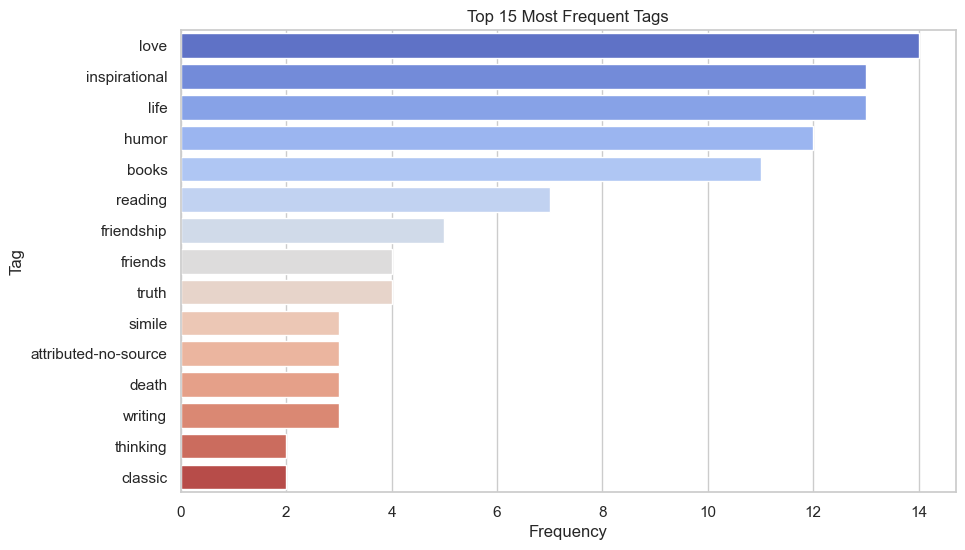

In [8]:
# Convert list-like strings to actual lists if necessary
df["tags"] = df["tags"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

all_tags = [tag for sublist in df['tags'] for tag in sublist]
tag_counts = Counter(all_tags).most_common(15)

tags_df = pd.DataFrame(tag_counts, columns=['tag', 'count'])

plt.figure(figsize=(10,6))
sns.barplot(data=tags_df, x="count", y="tag", palette="coolwarm")
plt.title("Top 15 Most Frequent Tags")
plt.xlabel("Frequency")
plt.ylabel("Tag")
plt.show()


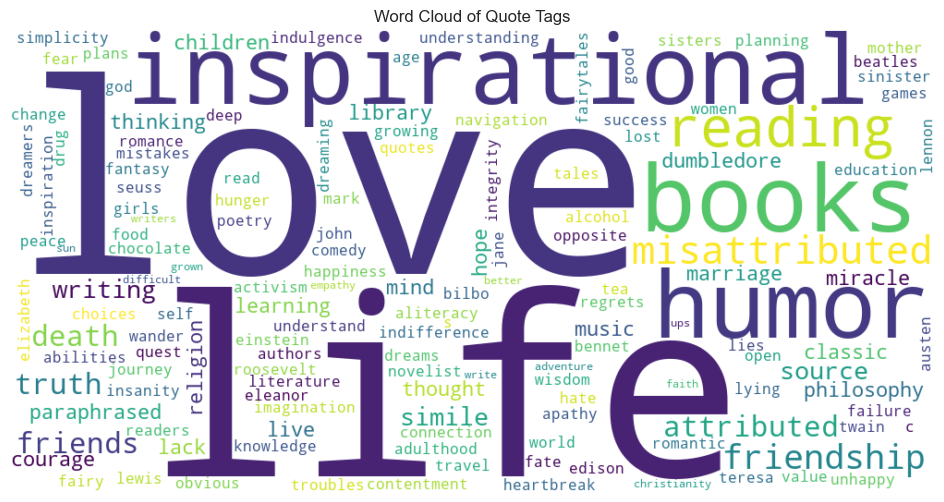

In [ ]:
tags_text = " ".join(all_tags)

wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(tags_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Quote Tags")
plt.show()


# Top Authors — Refined Visualization (Code)

C:\Users\linda\AppData\Local\Temp\ipykernel_9464\2820661040.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tags.values, y=top_tags.index, palette="crest")


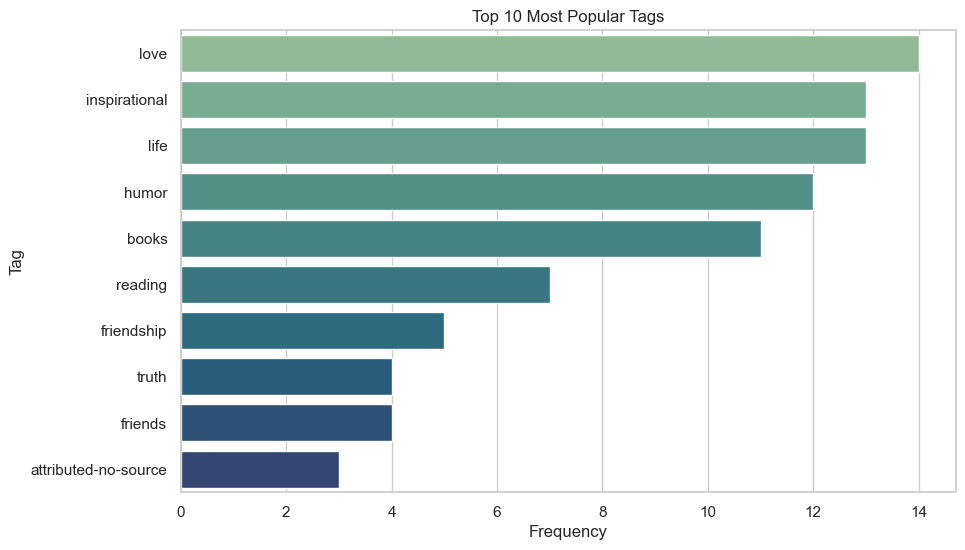

In [13]:
# Count tags frequency
tags_list = [tag for sublist in df['tags'] for tag in sublist]
tag_count = Counter(tags_list)
top_tags = pd.Series(tag_count).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_tags.values, y=top_tags.index, palette="crest")
plt.title("Top 10 Most Popular Tags")
plt.xlabel("Frequency")
plt.ylabel("Tag")
plt.show()


### Insight
Themes like **love, life, inspirational, and humor** dominate publicly shared quotes.


# Quote Length Analysis

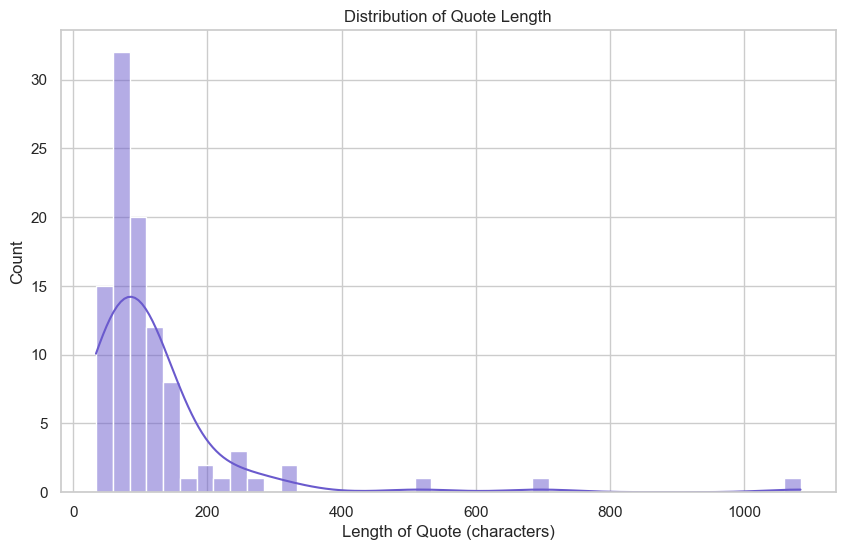

In [16]:
df['quote_length'] = df['quote'].apply(lambda x: len(x))

plt.figure(figsize=(10,6))
sns.histplot(df['quote_length'], kde=True, color="#6A5ACD")
plt.title("Distribution of Quote Length")
plt.xlabel("Length of Quote (characters)")
plt.ylabel("Count")
plt.show()

### Insight
Most quotes range between **120–160 characters**, meaning a preference for short, impactful messages.


# Author Birth Country Analysis (World Map — Plotly)

In [19]:
# Filter rows where born_location is string only
df_valid = df[df['born_location'].apply(lambda x: isinstance(x, str))].copy()

# Extract country
df_valid['country'] = df_valid['born_location'].apply(lambda x: x.split(",")[-1].strip())

# Create country counts
country_counts = df_valid['country'].value_counts().reset_index()
country_counts.columns = ['country','count']

# Show check
country_counts.head()


,country,count
0,The United States,36
1,The United Kingdom,21
2,Germany,13
3,in The United States,10
4,Ireland,6


In [20]:
country_counts = df_valid['country'].value_counts().reset_index()
country_counts.columns = ['country','count']

fig = px.choropleth(
    country_counts,
    locations='country',
    locationmode='country names',
    color='count',
    title="Quotes by Author Country of Origin",
    color_continuous_scale="tealrose"
)
fig.show()


## 📌 Final Insights Summary

- Albert Einstein leads in number of quotes — philosophical motivation popular among audiences.
- Most common themes:
  - love 
  - life 
  - inspirational 
- Quotes are **short & powerful** — easy to share and remember.
- Western authors dominate dataset representation → cultural bias in source website.